<a href="https://colab.research.google.com/github/ryanreilly/phase_5_capstone/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
!unzip drive/MyDrive/train.zip
!unzip drive/MyDrive/dev.zip
!unzip drive/MyDrive/test.zip

In [1]:
train_dir = 'train'
validation_dir = 'dev'
test_dir = 'test'

In [2]:
#For manipulating and visualizing images
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To load an image using Keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers, models, applications
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model


#to track how long the models run
import datetime

#For dividing the images into correct folders
import shutil
import os

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

VGG16 Transfer Learning


In [3]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
            
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=50,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              target_size=(256, 256), 
                                                              batch_size=50, 
                                                              class_mode='categorical')

Found 12422 images belonging to 7 classes.
Found 1458 images belonging to 7 classes.


In [4]:
train_generator_vgg = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=50,
                                                    class_mode='categorical')

validation_generator_vgg = validation_datagen.flow_from_directory(validation_dir, 
                                                              target_size=(224, 224), 
                                                              batch_size=50, 
                                                              class_mode='categorical')

Found 12422 images belonging to 7 classes.
Found 1458 images belonging to 7 classes.


In [ ]:
vggmodel = VGG16(weights='imagenet', 
                 include_top=True)

vggmodel.trainable = False

# Define Model Architecture
X = vggmodel.layers[-2].output
X = Dropout(0.2)(X)
predictions = Dense(7, activation="softmax")(X)
model_final = Model(inputs = vggmodel.input, outputs = predictions)


for layer in vggmodel.layers:
    layer.trainable = False


opt = optimizers.Adam(learning_rate=0.001)
model_final.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             period=1)

early = EarlyStopping(monitor='val_accuracy', 
                      min_delta=0, 
                      patience=40, 
                      verbose=1, 
                      mode='auto')

history_3 = model_final.fit_generator(generator= train_generator_vgg,
                                    steps_per_epoch= 2, 
                                    epochs= 100, 
                                    validation_data= validation_generator_vgg, 
                                    validation_steps=1, 
                                    callbacks=[checkpoint,early])

Epoch 1/100
2/2 [==============================] - 83s 54s/step - loss: 2.6138 - accuracy: 0.1800 - val_loss: 2.3202 - val_accuracy: 0.2600

Epoch 00001: val_accuracy improved from -inf to 0.26000, saving model to vgg16_1.h5
Epoch 2/100
2/2 [==============================] - 81s 53s/step - loss: 2.0972 - accuracy: 0.3700 - val_loss: 2.2937 - val_accuracy: 0.1200

Epoch 00002: val_accuracy did not improve from 0.26000
Epoch 3/100
2/2 [==============================] - 82s 54s/step - loss: 2.2428 - accuracy: 0.2500 - val_loss: 2.4706 - val_accuracy: 0.1600

Epoch 00003: val_accuracy did not improve from 0.26000
Epoch 4/100
2/2 [==============================] - 81s 53s/step - loss: 2.2013 - accuracy: 0.2200 - val_loss: 2.2564 - val_accuracy: 0.2800

Epoch 00004: val_accuracy improved from 0.26000 to 0.28000, saving model to vgg16_1.h5
Epoch 5/100
2/2 [==============================] - 80s 53s/step - loss: 1.8951 - accuracy: 0.3800 - val_loss: 2.0755 - val_accuracy: 0.3000

Epoch 00005: v

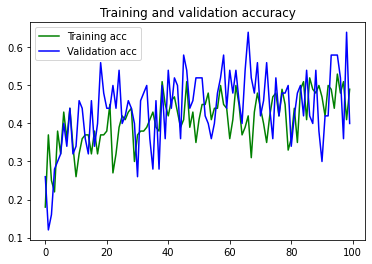

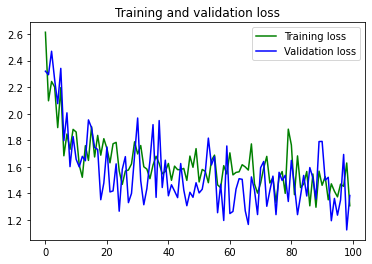

In [7]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
epochs = range(len(acc))


plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
history_3.